In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

os.chdir('..')
sys.path.append('.')

import datasets
from utils import metrics

%matplotlib inline

In [6]:
x, y = datasets.load_test_set()
x.shape, y.shape

((23000, 18), (23000, 6))

In [7]:
preds = np.load('predictions/test_manual_snapshot/test_manual_snapshot.npy')

In [23]:
individual = [metrics.SMAPE(y, p).mean() for p in preds]

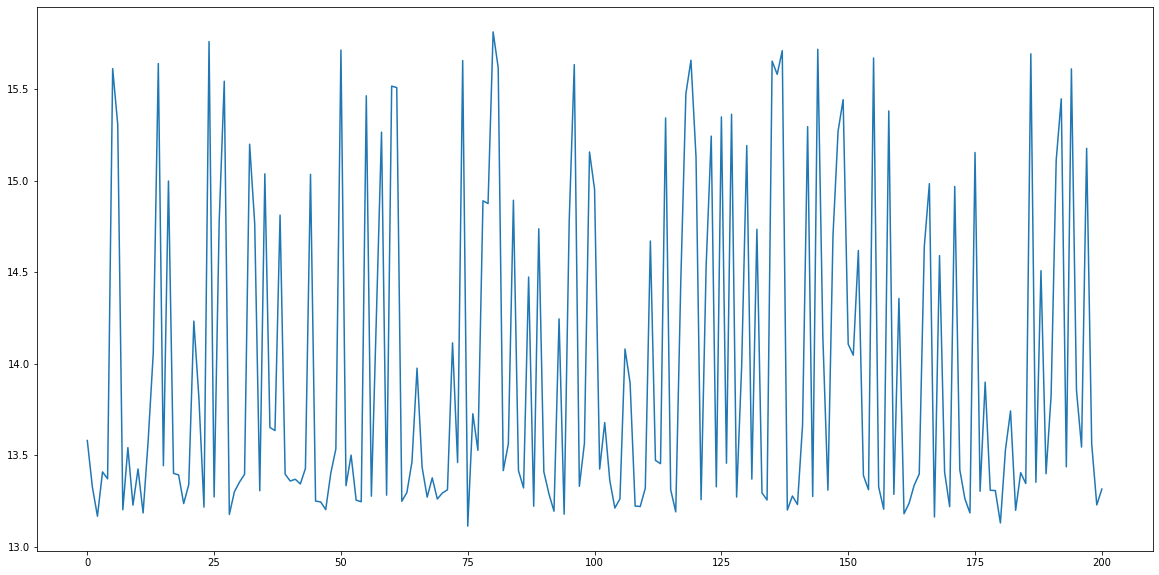

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(individual)

In [31]:
cumulative = [metrics.SMAPE(y, np.median(preds[:i], axis=0)).mean() for i in range(len(preds))]

/home/thanos/.envs/aug/lib/python3.6/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


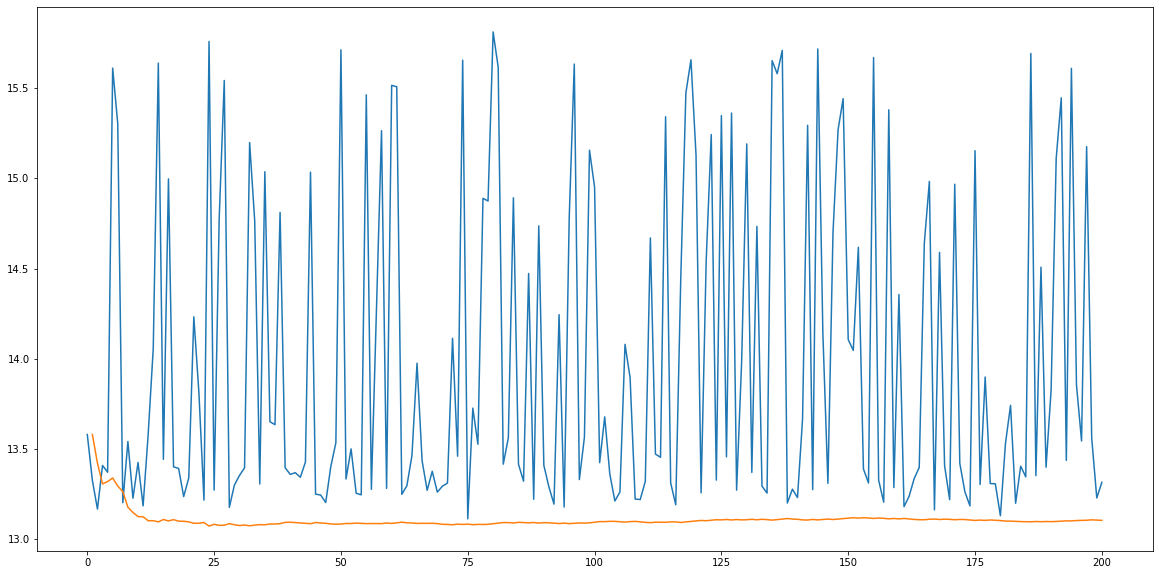

In [34]:
plt.figure(figsize=(20, 10))
plt.plot(individual)
plt.plot(cumulative)

In [36]:
cumulative_warmup = [metrics.SMAPE(y, np.median(preds[10:i], axis=0)).mean()
                     if i > 9 else np.nan 
                     for i in range(len(preds))]

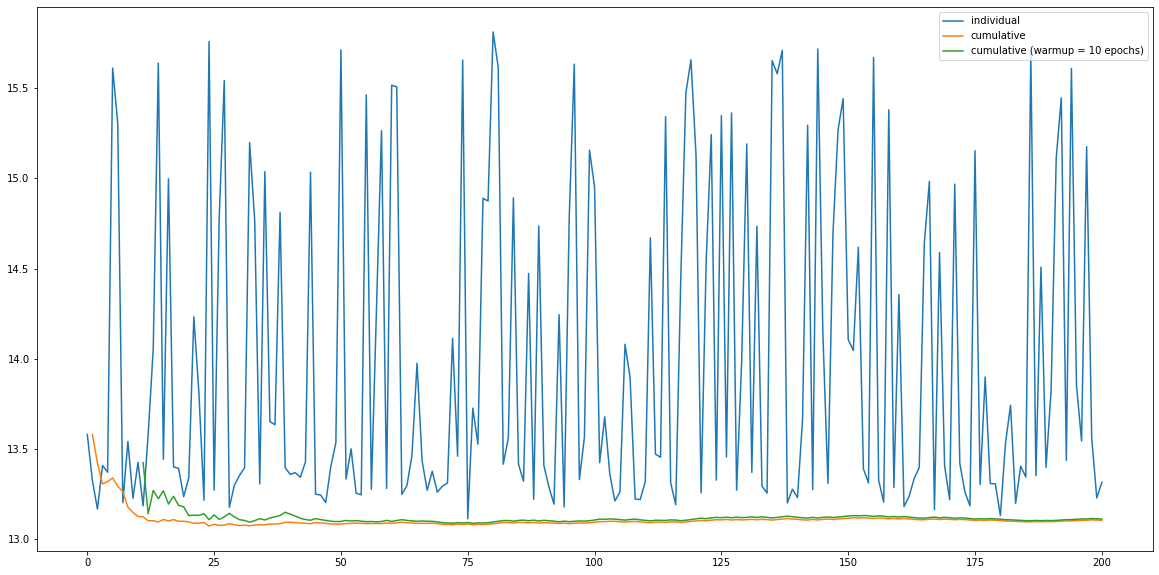

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(individual, label='individual')
plt.plot(cumulative, label='cumulative')
plt.plot(cumulative_warmup, label='cumulative (warmup = 10 epochs)')
plt.legend(loc='upper right')

In [42]:
per_n = [metrics.SMAPE(y, np.median(preds[::n], axis=0)).mean() for n in (2, 5, 10, 20, 50)]
per_n_warmup = [metrics.SMAPE(y, np.median(preds[10::n], axis=0)).mean() for n in (2, 5, 10, 20, 50)]

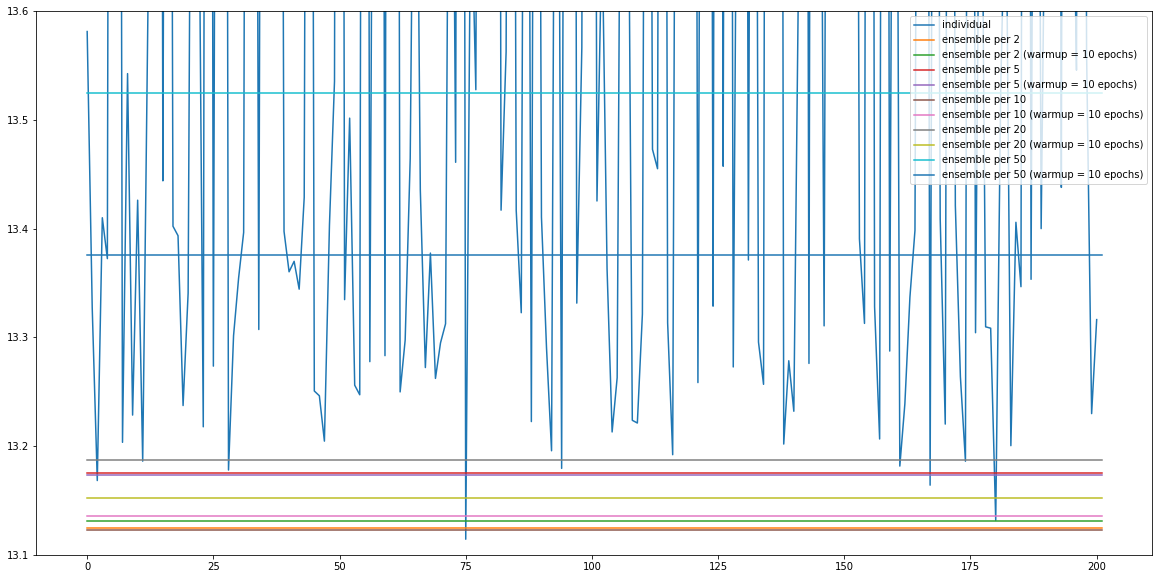

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(individual, label='individual')

for i, num in enumerate((2, 5, 10, 20, 50)):
    plt.plot([0, 201], [per_n[i]] * 2, label='ensemble per {}'.format(num))
    plt.plot([0, 201], [per_n_warmup[i]] * 2, label='ensemble per {} (warmup = 10 epochs)'.format(num))
    
plt.ylim([13.1, 13.6])
plt.legend(loc='upper right')

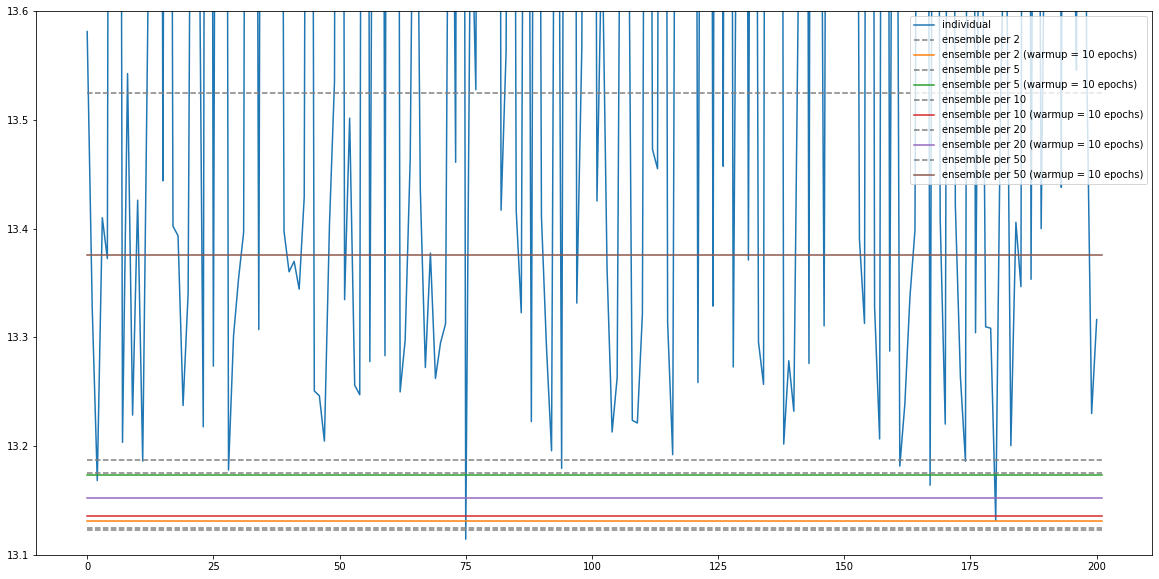

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(individual, label='individual')

for i, num in enumerate((2, 5, 10, 20, 50)):
    plt.plot([0, 201], [per_n[i]] * 2, ls='--', c='0.5', label='ensemble per {}'.format(num))
    plt.plot([0, 201], [per_n_warmup[i]] * 2, label='ensemble per {} (warmup = 10 epochs)'.format(num))
    
plt.ylim([13.1, 13.6])
plt.legend(loc='upper right')

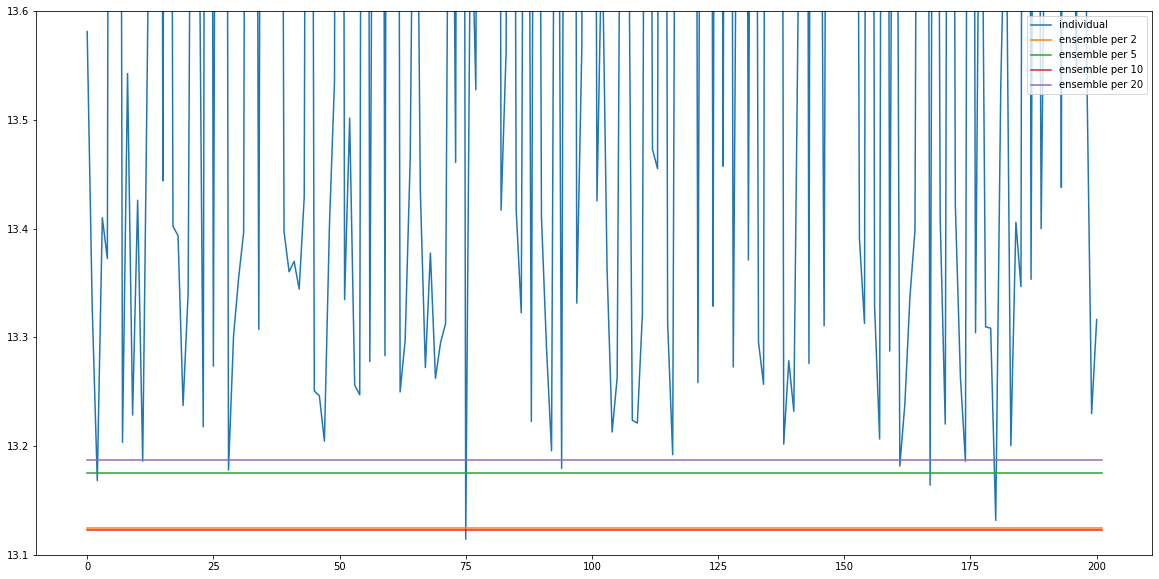

In [50]:
plt.figure(figsize=(20, 10))
plt.plot(individual, label='individual')

for i, num in enumerate((2, 5, 10, 20)):
    plt.plot([0, 201], [per_n[i]] * 2, label='ensemble per {}'.format(num))
#     plt.plot([0, 201], [per_n_warmup[i]] * 2, label='ensemble per {} (warmup = 10 epochs)'.format(num))
    
plt.ylim([13.1, 13.6])
plt.legend(loc='upper right')

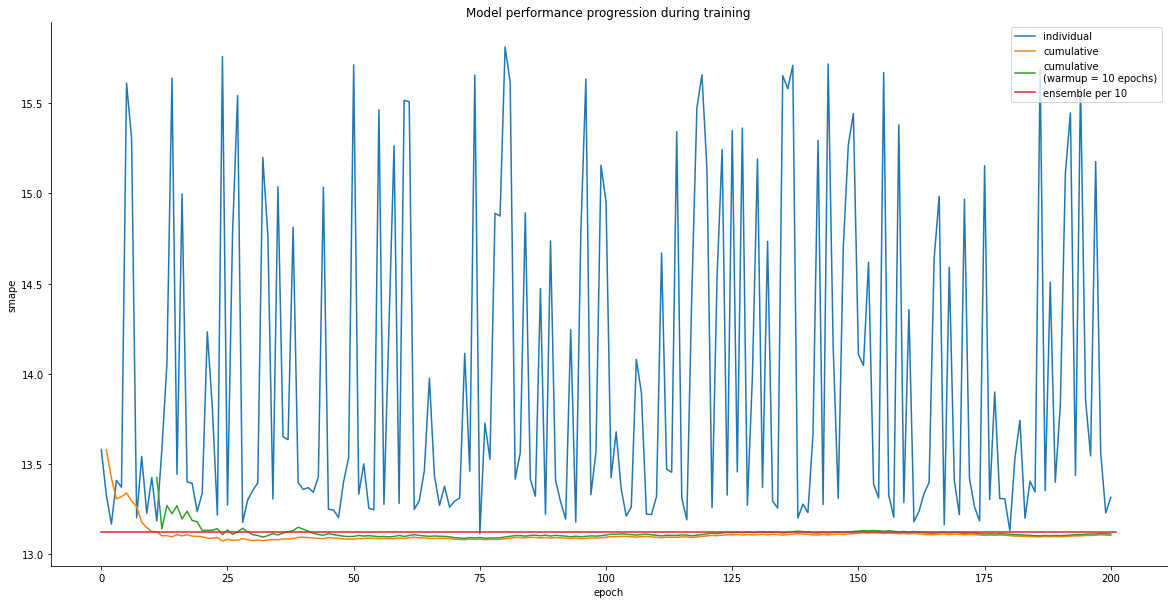

In [64]:
plt.figure(figsize=(20, 10))
plt.plot(individual, label='individual')
plt.plot(cumulative, label='cumulative')
plt.plot(cumulative_warmup, label='cumulative\n(warmup = 10 epochs)')

plt.plot([0, 201], [per_n[2]] * 2, label='ensemble per 10')

plt.legend(loc='upper right')

plt.title('Model performance progression during training')
plt.xlabel('epoch')
plt.ylabel('smape')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)